# Gold

### Общая информация:
Подготовим прототип модели машинного обучения для  предсказания коэффициента восстановления золота из золотосодержащей руды. В нашем распоряжении данные с параметрами добычи и очистки.

### План работ:

Подготовить данные;
Провести исследовательский анализ данных;
Построить и обучить модель.
### Описание датасета:
Описание данных
Технологический процесс
Rougher feed — исходное сырье
Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
Xanthate **— ксантогенат (промотер, или активатор флотации);
Sulphate — сульфат (на данном производстве сульфид натрия);
Depressant — депрессант (силикат натрия).
Rougher process (англ. «грубый процесс») — флотация
Rougher tails — отвальные хвосты
Float banks — флотационная установка
Cleaner process — очистка
Rougher Au — черновой концентрат золота
Final Au — финальный концентрат золота
Параметры этапов
air amount — объём воздуха
fluid levels — уровень жидкости
feed size — размер гранул сырья
feed rate — скорость подачи
Наименование признаков
Наименование признаков должно быть такое:
[этап].[тип_параметра].[название_параметра]
Пример: rougher.input.feed_ag
Возможные значения для блока [этап]:
rougher — флотация
primary_cleaner — первичная очистка
secondary_cleaner — вторичная очистка
final — финальные характеристики
Возможные значения для блока [тип_параметра]:
input — параметры сырья
output — параметры продукта
state — параметры, характеризующие текущее состояние этапа
calculation — расчётные характеристики


### Содержание:

<a href='#1'>1.Рассмотрим и подготовим данные</a>

<a href='#2'>2. Проанализируем данные</a>

<a href='#3'>3. Построим модель</a>

<a href='#4'>4.Выводы</a>


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import shuffle
from tqdm.notebook import tqdm
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler 


# 1.Рассмотрим и подготовим данные
 <a id='1'></a>

In [2]:
try:
    df_train=pd.read_csv('/datasets/gold_recovery_train.csv.')
    df_test=pd.read_csv('/datasets/gold_recovery_test.csv.')
    df=pd.read_csv('/datasets/gold_recovery_full.csv.')
except:
    df_train=pd.read_csv(r'C:\Users\litvinskaya.m\Desktop\Материалы курса Яндекс.Практикум\ноутбуки\сборный проект 2\gold_recovery_train.csv')
    df_test=pd.read_csv(r'C:\Users\litvinskaya.m\Desktop\Материалы курса Яндекс.Практикум\ноутбуки\сборный проект 2\gold_recovery_test.csv')
    df=pd.read_csv(r'C:\Users\litvinskaya.m\Desktop\Материалы курса Яндекс.Практикум\ноутбуки\сборный проект 2\gold_recovery_full.csv')

In [3]:
df.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

в тестовой выборке нет ничего о состоянии feed кроме входной на флотацию,все остальное условия обработки float banks. Вероятно все остальное целевые признаки

In [7]:
print(df_train[(df_train['rougher.input.feed_au']==0)&(df_train['final.output.concentrate_au']!=0)])

                      date  final.output.concentrate_ag  \
1149   2016-03-02 21:00:00                     5.773387   
1150   2016-03-02 22:00:00                     5.836274   
1925   2016-04-04 05:00:00                     2.299520   
2205   2016-04-15 21:00:00                     4.722832   
2415   2016-04-24 14:59:59                    10.690449   
...                    ...                          ...   
11925  2018-01-24 20:59:59                     0.559972   
11964  2018-01-26 11:59:59                     5.439339   
11965  2018-01-26 12:59:59                     5.964847   
11966  2018-01-26 13:59:59                     9.096064   
11967  2018-01-26 14:59:59                     2.144916   

       final.output.concentrate_pb  final.output.concentrate_sol  \
1149                     10.610730                      1.633899   
1150                     10.631206                      1.411665   
1925                      6.507272                      9.735825   
2205               

[99 rows x 87 columns]


отсутствие AU на входе не гарантирует отсутсвие AU на выходе

In [8]:
df_train.dropna(subset=['final.output.concentrate_au','rougher.output.concentrate_au','primary_cleaner.output.concentrate_au'],inplace=True)

In [9]:
C=df_train['rougher.output.concentrate_au']
F=df_train['rougher.input.feed_au']
T=df_train['rougher.output.tail_au']

In [10]:
df_train['rougher.output.recovery_2']=((C*(F-T))/(F*(C-T)))*100

In [11]:
df_train['diff']=df_train['rougher.output.recovery_2']-df_train['rougher.output.recovery']


In [12]:
df_train['diff'].head()

0    0.000000e+00
1    1.421085e-14
2    0.000000e+00
3    0.000000e+00
4    0.000000e+00
Name: diff, dtype: float64

In [13]:
df_train['diff']=df_train['diff'].fillna(0).astype('int')

In [14]:
print(df_train['diff'].sum())

0


In [15]:
target=df_train['rougher.output.recovery']
target_2=df_train['rougher.output.recovery_2']
for_mae=pd.DataFrame([target,target_2]).T
for_mae=for_mae.dropna()
print(for_mae)



       rougher.output.recovery  rougher.output.recovery_2
0                    87.107763                  87.107763
1                    86.843261                  86.843261
2                    86.842308                  86.842308
3                    87.226430                  87.226430
4                    86.688794                  86.688794
...                        ...                        ...
16855                89.574376                  89.574376
16856                87.724007                  87.724007
16857                88.890579                  88.890579
16858                89.858126                  89.858126
16859                89.514960                  89.514960

[14283 rows x 2 columns]


In [16]:
print(mean_absolute_error(for_mae['rougher.output.recovery'],for_mae['rougher.output.recovery']))

0.0


Эффективность обогащения расчитана правильно,MAE это подтверждает

In [17]:
columns=df_test.columns

In [18]:
for i in columns:
    print(i,"из них пустых",df_test[i].isna().sum())

date из них пустых 0
primary_cleaner.input.sulfate из них пустых 302
primary_cleaner.input.depressant из них пустых 284
primary_cleaner.input.feed_size из них пустых 0
primary_cleaner.input.xanthate из них пустых 166
primary_cleaner.state.floatbank8_a_air из них пустых 16
primary_cleaner.state.floatbank8_a_level из них пустых 16
primary_cleaner.state.floatbank8_b_air из них пустых 16
primary_cleaner.state.floatbank8_b_level из них пустых 16
primary_cleaner.state.floatbank8_c_air из них пустых 16
primary_cleaner.state.floatbank8_c_level из них пустых 16
primary_cleaner.state.floatbank8_d_air из них пустых 16
primary_cleaner.state.floatbank8_d_level из них пустых 16
rougher.input.feed_ag из них пустых 16
rougher.input.feed_pb из них пустых 16
rougher.input.feed_rate из них пустых 40
rougher.input.feed_size из них пустых 22
rougher.input.feed_sol из них пустых 67
rougher.input.feed_au из них пустых 16
rougher.input.floatbank10_sulfate из них пустых 257
rougher.input.floatbank10_xanthate и

In [19]:
df_test=df_test.fillna(method='ffill')
df=df.fillna(method='ffill')
df_train=df_train.fillna(method='ffill')

In [20]:
df_test=df_test.set_index('date')
df=df.set_index('date')
df_train=df_train.set_index('date')

In [21]:
name1=df_train.columns
name2=df_test.columns

In [22]:
df_train=df_train[name2]

In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16763 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               16763 non-null  float64
 1   primary_cleaner.input.depressant            16763 non-null  float64
 2   primary_cleaner.input.feed_size             16763 non-null  float64
 3   primary_cleaner.input.xanthate              16763 non-null  float64
 4   primary_cleaner.state.floatbank8_a_air      16763 non-null  float64
 5   primary_cleaner.state.floatbank8_a_level    16763 non-null  float64
 6   primary_cleaner.state.floatbank8_b_air      16763 non-null  float64
 7   primary_cleaner.state.floatbank8_b_level    16763 non-null  float64
 8   primary_cleaner.state.floatbank8_c_air      16763 non-null  float64
 9   primary_cleaner.state.floatbank8_c_level    16763 non-nu

выкинули из тренировочной выборки лишние колонки

In [24]:
df.columns

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state

In [25]:
target_columns=df.drop([ 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.au_pb_ratio', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.concentrate_au',
       'rougher.output.tail_ag', 'rougher.output.tail_pb',
       'rougher.output.tail_sol', 'rougher.output.tail_au',
       'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level',
       'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level',
       'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_c_level',
       'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_d_level',
       'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_e_level',
       'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_f_level',
       'secondary_cleaner.output.tail_ag', 'secondary_cleaner.output.tail_pb',
       'secondary_cleaner.output.tail_sol', 'secondary_cleaner.output.tail_au',
       'secondary_cleaner.state.floatbank2_a_air',
       'secondary_cleaner.state.floatbank2_a_level',
       'secondary_cleaner.state.floatbank2_b_air',
       'secondary_cleaner.state.floatbank2_b_level',
       'secondary_cleaner.state.floatbank3_a_air',
       'secondary_cleaner.state.floatbank3_a_level',
       'secondary_cleaner.state.floatbank3_b_air',
       'secondary_cleaner.state.floatbank3_b_level',
       'secondary_cleaner.state.floatbank4_a_air',
       'secondary_cleaner.state.floatbank4_a_level',
       'secondary_cleaner.state.floatbank4_b_air',
       'secondary_cleaner.state.floatbank4_b_level',
       'secondary_cleaner.state.floatbank5_a_air',
       'secondary_cleaner.state.floatbank5_a_level',
       'secondary_cleaner.state.floatbank5_b_air',
       'secondary_cleaner.state.floatbank5_b_level',
       'secondary_cleaner.state.floatbank6_a_air',
       'secondary_cleaner.state.floatbank6_a_level'],axis=1)

In [26]:
target_columns.head()

,final.output.recovery,rougher.output.recovery
date,,
2016-01-15 00:00:00,70.541216,87.107763
2016-01-15 01:00:00,69.266198,86.843261
2016-01-15 02:00:00,68.116445,86.842308
2016-01-15 03:00:00,68.347543,87.226430
2016-01-15 04:00:00,66.927016,86.688794


In [27]:
df_test=df_test.join(target_columns)

df_train=df_train.join(target_columns)

In [28]:
df_test.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final.output.recovery,rougher.output.recovery
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,70.273583,89.993421
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,68.910432,88.089657
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,68.143213,88.412756
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,67.776393,87.360133
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,61.467078,83.236367


In [29]:
df_train['final.output.recovery'].isnull().sum()

0

# 2. Проанализируем данные
 <a id='2'></a>

2.1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.

In [30]:
AU_states=['rougher.input.feed_au','rougher.output.concentrate_au','primary_cleaner.output.concentrate_au','final.output.concentrate_au']

AG_states=['rougher.input.feed_ag','rougher.output.concentrate_ag','primary_cleaner.output.concentrate_ag','final.output.concentrate_ag']

PB_states=['rougher.input.feed_pb','rougher.output.concentrate_pb','primary_cleaner.output.concentrate_pb','final.output.concentrate_pb']


Text(0.5, 1.0, 'AU_states')

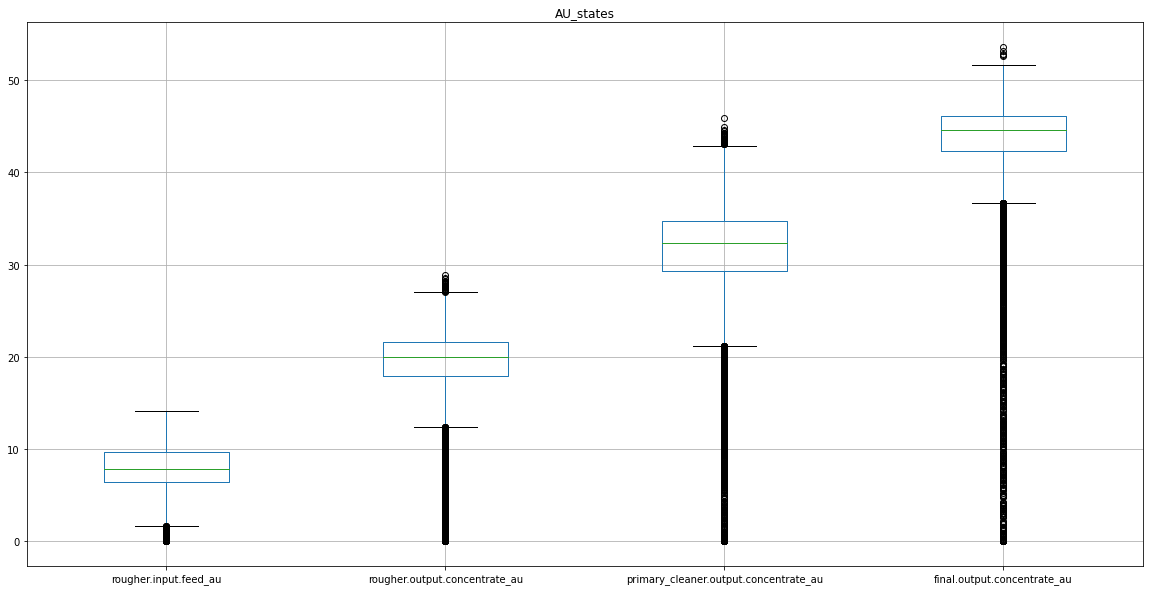

In [31]:
df[AU_states].boxplot(figsize=(20,10))
plt.title('AU_states')

Text(0.5, 1.0, 'AG_states')

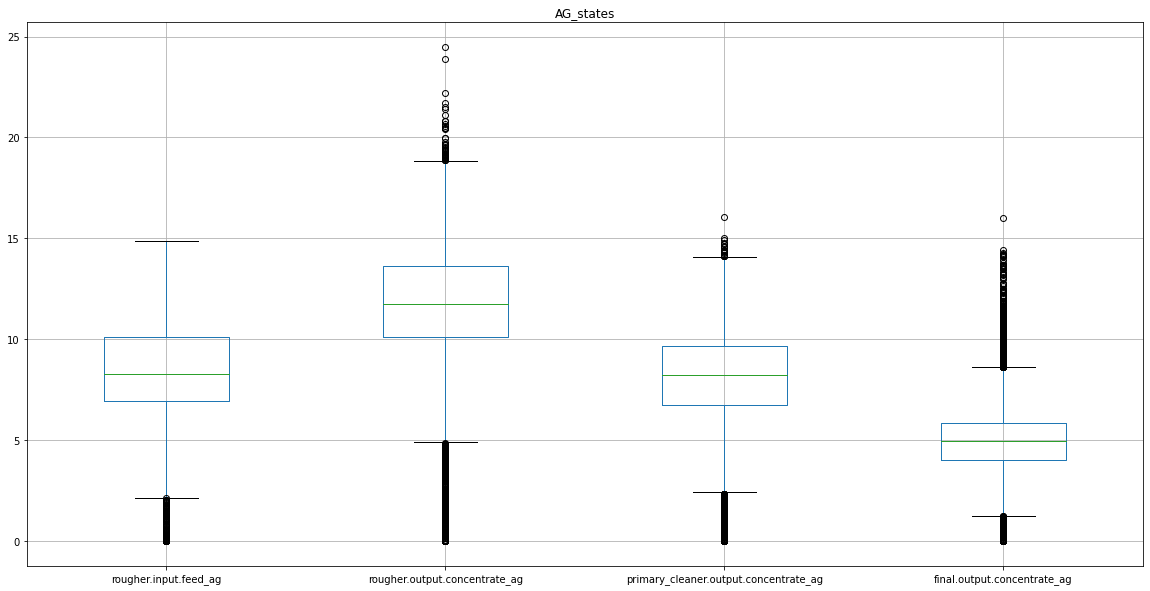

In [32]:
df[AG_states].boxplot(figsize=(20,10))
plt.title('AG_states')

Text(0.5, 1.0, 'PB_states')

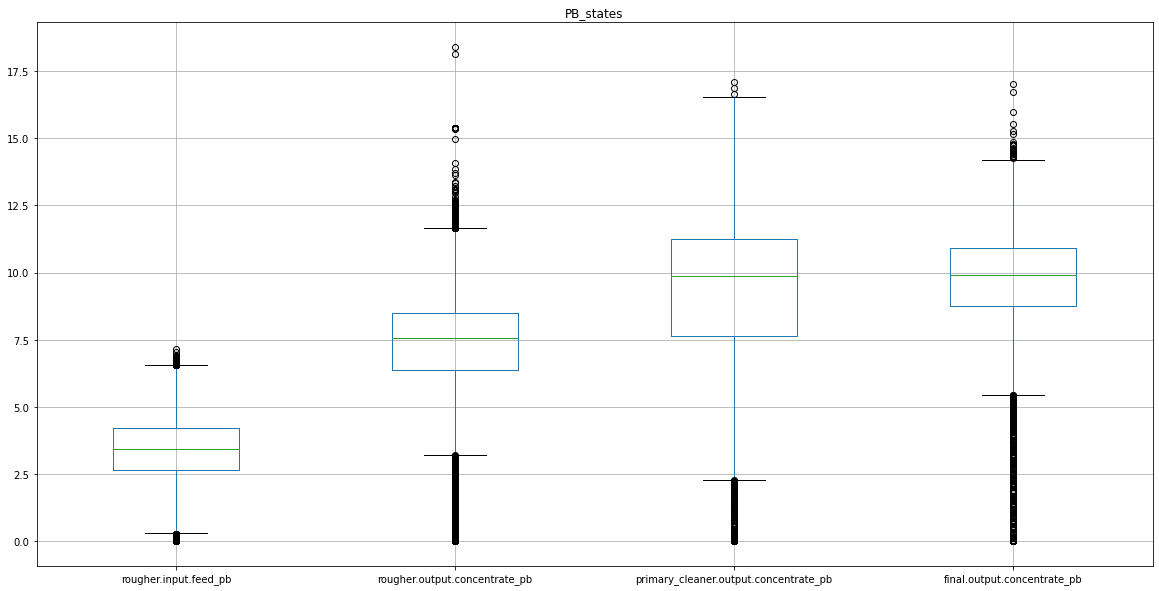

In [33]:
df[PB_states].boxplot(figsize=(20,10))
plt.title('PB_states')

Концентрация золота закономерно растет от первого этапа к последнему.Серебро показывает странный всплеск после флотации, с огромным количеством выбросов, а затем падает.Концентрация свинца растет.

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> имеется ввиду размещение всех металов на одном графике?
</div>

2.2. Сравните распределения размеров гранул сырья rougher.input.feed_size  на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

Text(0.5, 0, 'rougher.input.feed_size')

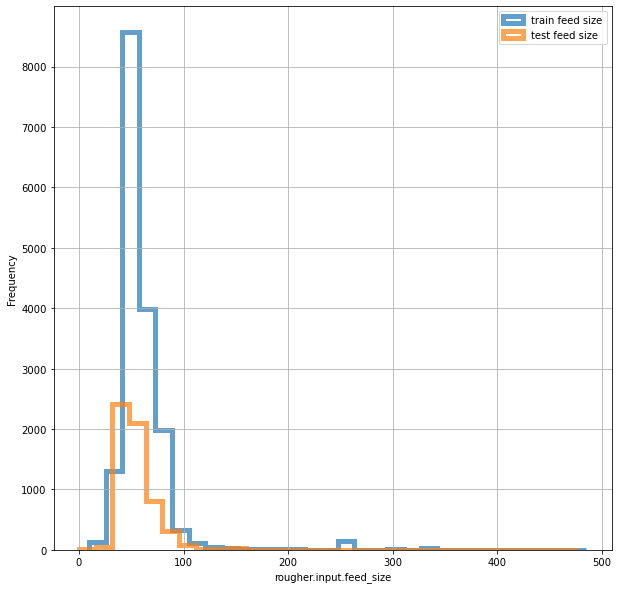

In [34]:
ax=df_train.plot(kind='hist',y='rougher.input.feed_size',histtype='step',linewidth=5,alpha=0.7,label='train feed size',grid=True,legend=True,bins=30)
df_test.plot(ax=ax,kind='hist',y='rougher.input.feed_size',histtype='step',linewidth=5,alpha=0.7,label='test feed size',grid=True,legend=True,figsize=(10,10),bins=30)
plt.xlabel('rougher.input.feed_size')

распределения похожи, центр примерно в одном месте,даже выбросы примерно одинаковые

2.3. Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Заметили аномальные значения в суммарном распределении или нет? Если они есть, стоит ли их удалять из обеих выборок? Опишите выводы и удалите аномалии.

In [35]:
df['total_feed_concentrate']=df['rougher.input.feed_ag']+df['rougher.input.feed_pb']+df['rougher.input.feed_sol']+df['rougher.input.feed_au']

In [36]:
df['total_rougher_output_concentrate']=df['rougher.output.concentrate_au']+df['rougher.output.concentrate_ag']+df['rougher.output.concentrate_pb']+df['rougher.output.concentrate_sol']

In [37]:
df['total_final_concentrate']=df['final.output.tail_ag']+df['final.output.tail_au']+df['final.output.tail_pb']+df['final.output.tail_sol']

In [38]:
df.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,total_feed_concentrate,total_rougher_output_concentrate,total_final_concentrate
count,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,...,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000
mean,4.768013,9.071366,8.537502,39.891718,66.475263,8.900622,2.471149,9.434396,2.819885,131.338303,...,-477.753153,14.831127,-504.279270,11.588761,-501.510723,17.904473,-520.266675,51.856810,61.518427,23.626052
std,2.042594,3.260960,3.858203,13.540157,13.042781,3.544045,1.201069,4.145832,1.269214,58.477466,...,95.648618,6.417280,74.648011,5.780520,80.663516,6.717178,76.976308,17.934564,23.412615,8.583268
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526,0.000000,0.000000,0.000000
25%,4.011471,8.737809,7.036629,42.353890,62.258453,7.669323,1.780344,8.050901,2.297002,101.198976,...,-500.319422,10.938055,-500.641708,8.031211,-500.171370,13.031799,-501.000058,51.400302,63.325353,22.580239
50%,4.949959,9.910363,8.858385,44.639019,67.981407,9.477554,2.643964,10.174399,2.910336,137.084713,...,-499.616792,14.615849,-499.868380,10.987789,-499.953415,18.002995,-500.098653,56.788595,69.414309,25.408284
75%,5.857985,10.927188,10.667178,46.106662,72.941119,11.084153,3.282285,11.840024,3.552452,170.993920,...,-400.229299,18.014080,-498.503626,13.999903,-499.499414,23.007616,-499.527882,61.405688,74.025452,28.207676
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593,76.978947,90.964431,43.270605


Text(0.5, 1.0, 'финальные концентраты')

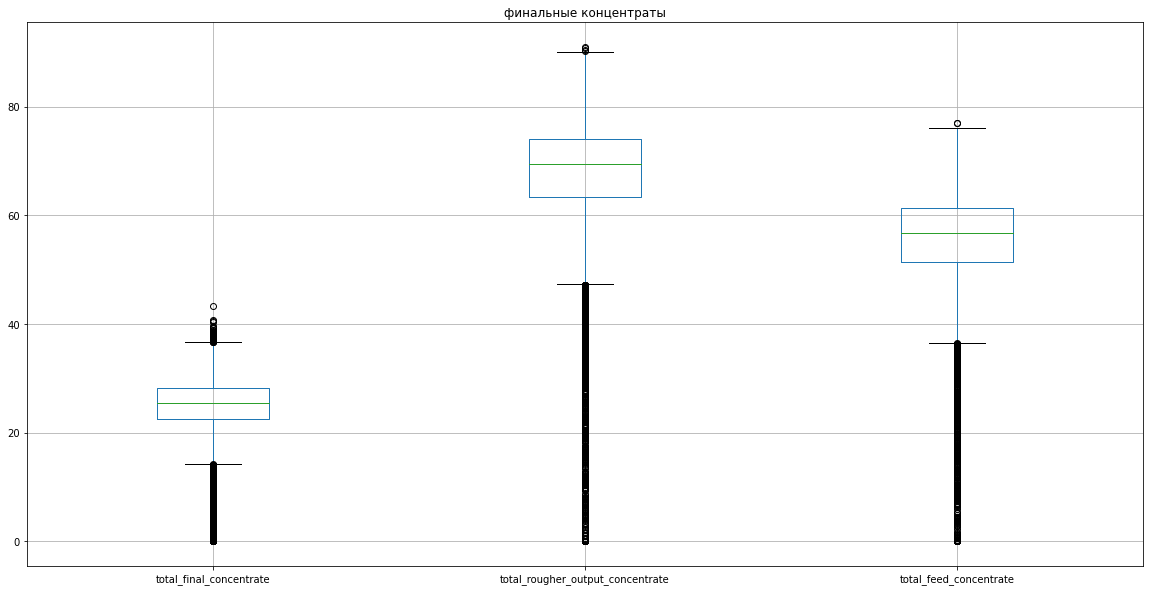

In [39]:
df.boxplot(column=['total_final_concentrate','total_rougher_output_concentrate','total_feed_concentrate'],figsize=(20,10))
plt.title('финальные концентраты')

In [40]:
index_zero=df.query('total_feed_concentrate==0 or total_rougher_output_concentrate==0 or total_final_concentrate==0' )

In [41]:
index_zero['delite']='yes'

<ipython-input-41-8124be19c790>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  index_zero['delite']='yes'


In [42]:
def clean (df):
    df=df.join(index_zero['delite'],how='left')
    df=df.query('delite != "yes"')
    return df

In [43]:
df=clean(df)
df_train=clean(df_train)
df_test=clean(df_test)

In [44]:
df.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,total_feed_concentrate,total_rougher_output_concentrate,total_final_concentrate
count,20053.000000,20053.000000,20053.000000,20053.000000,20053.000000,20053.000000,20053.000000,20053.000000,20053.000000,20053.000000,...,20053.000000,20053.000000,20053.000000,20053.000000,20053.000000,20053.000000,20053.000000,20053.000000,20053.000000,20053.000000
mean,5.202033,9.910610,9.355152,43.636178,66.616316,9.770210,2.706044,10.415916,3.079028,143.640163,...,-462.026677,15.680284,-488.574119,12.219553,-486.985096,18.925954,-505.371451,56.947878,68.882830,25.971198
std,1.505294,1.828127,3.003043,6.261881,10.926048,2.299991,0.963812,2.997788,0.951725,46.190480,...,66.670206,5.500887,34.725236,5.291942,38.265787,5.530272,38.939700,8.183140,10.495952,4.532512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000777,0.001982,...,-800.836914,-0.372054,-797.323986,0.470391,-800.220337,-0.079426,-810.473526,0.040000,0.039898,0.020247
25%,4.256786,9.113381,7.586523,43.234243,63.147675,8.094793,2.028323,8.757611,2.470586,113.082860,...,-500.187500,10.988119,-500.458294,8.978635,-500.130300,14.982377,-500.741037,53.326785,66.123096,23.454886
50%,5.094340,10.086782,9.163428,44.918025,68.096082,9.823218,2.741894,10.519407,3.004523,142.943299,...,-499.481474,14.998891,-499.794167,11.021637,-499.934705,19.945680,-500.048190,57.531682,70.336459,25.854826
75%,5.936612,11.030778,10.945325,46.225404,72.638507,11.225892,3.343519,12.026146,3.596330,175.160799,...,-400.155121,18.026480,-498.358743,14.018934,-499.445179,23.751053,-499.480436,61.970307,74.607688,28.560548
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,265.983123,...,-6.506986,43.709931,-244.483566,27.926001,-126.463446,32.188906,-29.093593,76.978947,90.964431,43.270605


очистили данные от аномальных значений, а именно от сумарных значений сырья равных нулю.

# 3. Построим модель
 <a id='3'></a>

In [45]:
def smape(target, prediction):
    return  100/len(target) * np.sum(2 * np.abs(prediction - target) / (np.abs(target) + np.abs(prediction)))


In [46]:
def smape_final(target_r, prediction_r,target_f, prediction_f):
    rougher=100/len(target_r) * np.sum(2 * np.abs(prediction_r - target_r) / (np.abs(target_r) + np.abs(prediction_r)))
    final=100/len(target_f) * np.sum(2 * np.abs(prediction_f - target_f) / (np.abs(target_f) + np.abs(prediction_f)))
    return 0.25*rougher+0.75*final

smape для оценки модели и smape_final для финальной оценки

In [47]:
df_train.columns

Index(['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatba

In [48]:
names_train=['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level',
       'secondary_cleaner.state.floatbank2_a_air',
       'secondary_cleaner.state.floatbank2_a_level',
       'secondary_cleaner.state.floatbank2_b_air',
       'secondary_cleaner.state.floatbank2_b_level',
       'secondary_cleaner.state.floatbank3_a_air',
       'secondary_cleaner.state.floatbank3_a_level',
       'secondary_cleaner.state.floatbank3_b_air',
       'secondary_cleaner.state.floatbank3_b_level',
       'secondary_cleaner.state.floatbank4_a_air',
       'secondary_cleaner.state.floatbank4_a_level',
       'secondary_cleaner.state.floatbank4_b_air',
       'secondary_cleaner.state.floatbank4_b_level',
       'secondary_cleaner.state.floatbank5_a_air',
       'secondary_cleaner.state.floatbank5_a_level',
       'secondary_cleaner.state.floatbank5_b_air',
       'secondary_cleaner.state.floatbank5_b_level',
       'secondary_cleaner.state.floatbank6_a_air',
       'secondary_cleaner.state.floatbank6_a_level','rougher.output.recovery','final.output.recovery']

In [49]:
for i in names_train:
    df_train[i]=pd.to_numeric(df_train[i],errors='coerce')
    df_train[i]=df_train[i].astype('int')

In [50]:
features_train=df_train.drop(['rougher.output.recovery','final.output.recovery','delite'],axis=1)
target_train=df_train['rougher.output.recovery']
target_train_2=df_train['final.output.recovery']

In [51]:
features_train.columns

Index(['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatba

In [52]:
numeric=['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level',
       'secondary_cleaner.state.floatbank2_a_air',
       'secondary_cleaner.state.floatbank2_a_level',
       'secondary_cleaner.state.floatbank2_b_air',
       'secondary_cleaner.state.floatbank2_b_level',
       'secondary_cleaner.state.floatbank3_a_air',
       'secondary_cleaner.state.floatbank3_a_level',
       'secondary_cleaner.state.floatbank3_b_air',
       'secondary_cleaner.state.floatbank3_b_level',
       'secondary_cleaner.state.floatbank4_a_air',
       'secondary_cleaner.state.floatbank4_a_level',
       'secondary_cleaner.state.floatbank4_b_air',
       'secondary_cleaner.state.floatbank4_b_level',
       'secondary_cleaner.state.floatbank5_a_air',
       'secondary_cleaner.state.floatbank5_a_level',
       'secondary_cleaner.state.floatbank5_b_air',
       'secondary_cleaner.state.floatbank5_b_level',
       'secondary_cleaner.state.floatbank6_a_air',
       'secondary_cleaner.state.floatbank6_a_level']

In [53]:
scaler =StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric]=scaler.transform(features_train[numeric])



In [55]:
warnings.filterwarnings('ignore')
best_model_Wald=None
best_estimators=0
best_features=0
best_depth=0
best_result_f1=0
best_sampl=0
for est in tqdm(range(1,50, 5), desc='Est loop'):
    for features in tqdm([None, 'log2', 'sqrt'], desc='Max features loop', leave=False):
        for depth in tqdm(range(1, 50,5), desc='Depth loop', leave=False):
            for sampl in tqdm(range(2,15, 2), desc='Sample split loop', leave=False):
                model_Wald=RandomForestRegressor(random_state=42,n_estimators=est,min_samples_leaf=1, min_samples_split=sampl, max_features=features, max_depth=depth)
                model_Wald.fit(features_train,target_train)
                result=cross_val_score(model_Wald, features_train, target_train, cv=3).mean()
                if result>best_result_f1:
                    best_model_Wald=model_Wald
                    best_result_f1=result
                    best_estimators=est
                    best_features=features
                    best_depth=depth
                    best_sampl=sampl
print('RandomForest, лучший результат:',best_result_f1)
print('RandomForest, количество деревьев:',best_estimators)
print('RandomForest, количество признаков:',best_features)
print('RandomForest, глубина:',best_depth)
print('RandomForest, sample split:',best_sampl)

KeyboardInterrupt: 

In [ ]:
warnings.filterwarnings('ignore')
best_model_Baum=None
best_result=0
best_depth=0
for depth in range(1,10):
    model_Baum=DecisionTreeRegressor(random_state=42,max_depth=depth,class_weight='balanced')
    model_Baum.fit(features_train,target_train)
    result=cross_val_score(model_Baum, features_train, target_train, cv=3).mean()          
    if result>best_result:
        best_model_Baum=model_Baum
        best_result=result
        best_depth=depth
print('лучший результат:',best_result)
print('оптимальная глубина:',best_depth)

In [ ]:
warnings.filterwarnings('ignore')
best_model_Wald_2=None
best_estimators_2=0
best_features_2=0
best_depth_2=0
best_result_2=0
best_sample_2=0
for est in tqdm(range(1,100, 5), desc='Est loop'):
    for features in tqdm([None, 'log2', 'sqrt'], desc='Max features loop', leave=False):
        for depth in tqdm(range(1, 10), desc='Depth loop', leave=False):
            for sampl in tqdm(range(2,15, 1), desc='Sample split loop', leave=False):
                model_Wald_2=RandomForestRegressor(random_state=42,n_estimators=est, max_features=features, max_depth=depth,min_samples_leaf=1,min_samples_split=sampl)
                model_Wald_2.fit(features_train,target_train_2)
                result_2=cross_val_score(model_Wald_2, features_train, target_train_2, cv=3).mean()
                if result_2>best_result_2:
                    best_model_Wald_2=model_Wald_2
                    best_result_2=result_2
                    best_estimators_2=est
                    best_features_2=features
                    best_depth_2=depth
                    best_sample_2=sampl
print('RandomForest, лучший результат:',best_result_2)
print('RandomForest, количество деревьев:',best_estimators_2)
print('RandomForest, количество признаков:',best_features_2)
print('RandomForest, глубина:',best_depth_2)
print('RandomForest, sample split:',best_sample_2)

In [ ]:
warnings.filterwarnings('ignore')
best_model_Baum_2=None
best_result_2=0
best_depth_2=0
for depth in range(1,10):
    model_Baum_2=DecisionTreeRegressor(random_state=42,max_depth=depth,class_weight='balanced')
    model_Baum_2.fit(features_train,target_train_2)
    result_2=cross_val_score(model_Baum_2, features_train, target_train_2, cv=3).mean()          
    if result_2>best_result_2:
        best_model_Baum_2=model_Baum_2
        best_result_2=result_2
        best_depth_2=depth
print('лучший результат:',best_result_2)
print('оптимальная глубина:',best_depth_2)

In [ ]:
for i in names_train:
    df_test[i]=pd.to_numeric(df_test[i],errors='coerce')
    df_test[i]=df_test[i].astype('int')

In [ ]:
features_test=df_test.drop(['rougher.output.recovery','final.output.recovery','delite'],axis=1)
target_test=df_test['rougher.output.recovery']
target_test_2=df_test['final.output.recovery']

In [ ]:
features_test[numeric]=scaler.transform(features_test[numeric])

In [ ]:
predict_1=best_model_Baum.predict(features_test)
predict_2=best_model_Baum_2.predict(features_test)
predict_3=best_model_Wald.predict(features_test)
predict_4=best_model_Wald_2.predict(features_test)

In [ ]:
print('Final sMAPE for Tree:',smape_final(target_test, predict_1,target_test_2, predict_2))

print('Final sMAPE for Forest:',smape_final(target_test, predict_3,target_test_2,predict_4))

проверка адекватности модели:

In [ ]:
data1=[]
for i in range (len(target_train)):
    number=target_train.mean()
    data1.append(number)
target_pred_constant_r = pd.Series(data1)

data2=[]
for i in range (len(target_train_2)):
    number2=target_train_2.mean()
    data2.append(number2)
target_pred_constant_f = pd.Series(data2)


In [ ]:
print('Final sMAPE for Constant Model',smape_final(target_test, target_pred_constant_r,target_test_2,target_pred_constant_f))


In [ ]:
median_rougher = pd.Series(target_train.median(),index=target_test.index)
median_final = pd.Series(target_train_2.median(), index=target_test_2.index)
const = 0.25*smape(target_test, median_rougher)+0.75*smape(target_test_2, median_final)
print(const)

In [ ]:
dummy_regr_r = DummyRegressor(strategy="mean")
dummy_regr_r.fit(features_train,target_train)
dummy_r=dummy_regr_r.predict(features_test)

dummy_regr_f = DummyRegressor(strategy="mean")
dummy_regr_f.fit(features_train,target_train_2)
dummy_f=dummy_regr_f.predict(features_test)

In [ ]:
print('Final sMAPE for Constant Model',smape_final(target_test,dummy_r,target_test_2,dummy_f))


# 4.Выводы
 <a id='4'></a>

sMAPE на дереве показала лучшие результаты, поэтому в качестве прототипа мы выбираем ее.